In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Hr Analysis.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.drop_duplicates()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


## Dataset general overview

In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


#### Checking null values

In [6]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
(df.isna().sum() / df.shape[0]) * 100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

## Univariate Analysis

#### "department" uni analysis

<AxesSubplot:xlabel='department'>

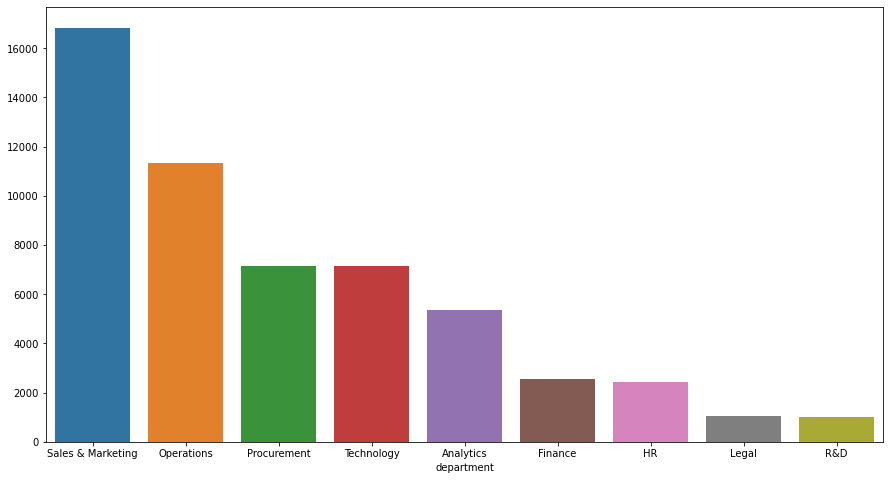

In [8]:
plt.figure(figsize=[15, 8])
department_count = (df.groupby('department').count()).employee_id.sort_values(ascending=False)
sns.barplot(x=department_count.index, y= department_count.values)

#### "region" uni analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'region_2'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'region_7'),
  Text(3, 0, 'region_15'),
  Text(4, 0, 'region_13'),
  Text(5, 0, 'region_26'),
  Text(6, 0, 'region_31'),
  Text(7, 0, 'region_4'),
  Text(8, 0, 'region_27'),
  Text(9, 0, 'region_16'),
  Text(10, 0, 'region_28'),
  Text(11, 0, 'region_11'),
  Text(12, 0, 'region_23'),
  Text(13, 0, 'region_29'),
  Text(14, 0, 'region_32'),
  Text(15, 0, 'region_19'),
  Text(16, 0, 'region_20'),
  Text(17, 0, 'region_14'),
  Text(18, 0, 'region_25'),
  Text(19, 0, 'region_17'),
  Text(20, 0, 'region_5'),
  Text(21, 0, 'region_6'),
  Text(22, 0, 'region_30'),
  Text(23, 0, 'region_8'),
  Text(24, 0, 'region_10'),
  Text(25, 0, 'region_1'),
  Text(26, 0, 'region_24'),
  Text(27, 0, 'region_12'),
  Text(28, 0, 'region_9'),
  Text(29, 0, 'region_21'),
  Text(30, 0, 'region_3'

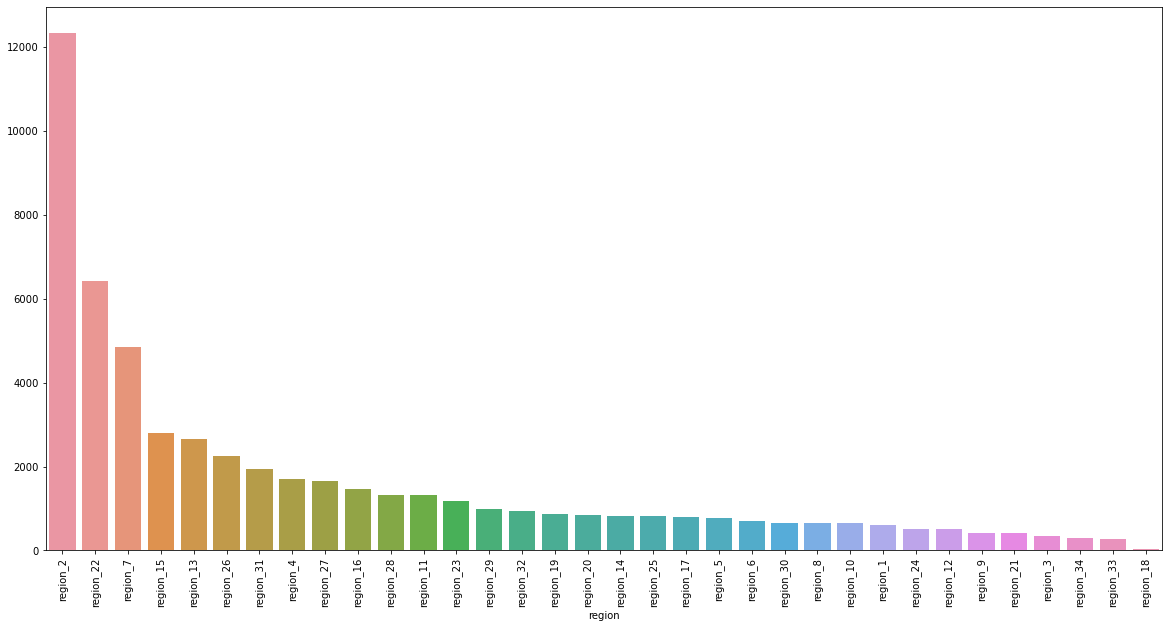

In [9]:
plt.figure(figsize=[20, 10])
region_count = (df.groupby('region').count()).employee_id.sort_values(ascending=False)
sns.barplot(x=region_count.index, y= region_count.values)
plt.xticks(rotation = 90)

#### "education" uni analysis

<AxesSubplot:xlabel='education', ylabel='count'>

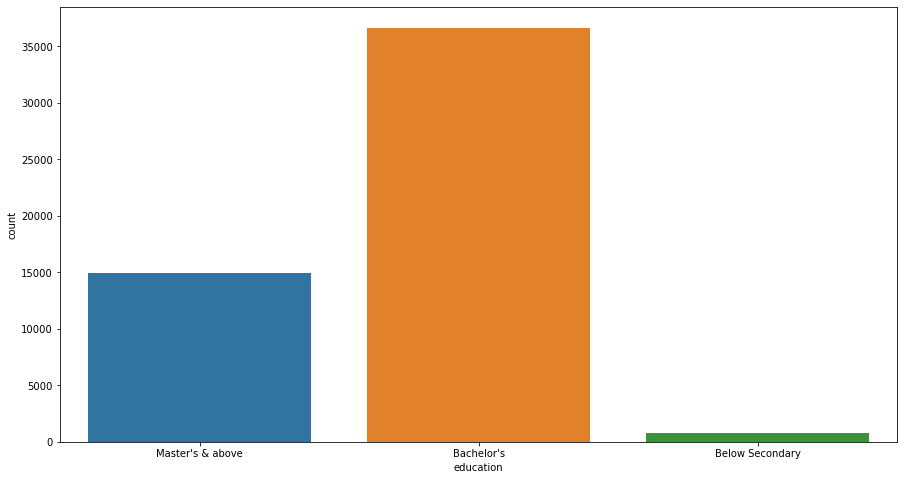

In [10]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.education)

#### "gender" uni analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

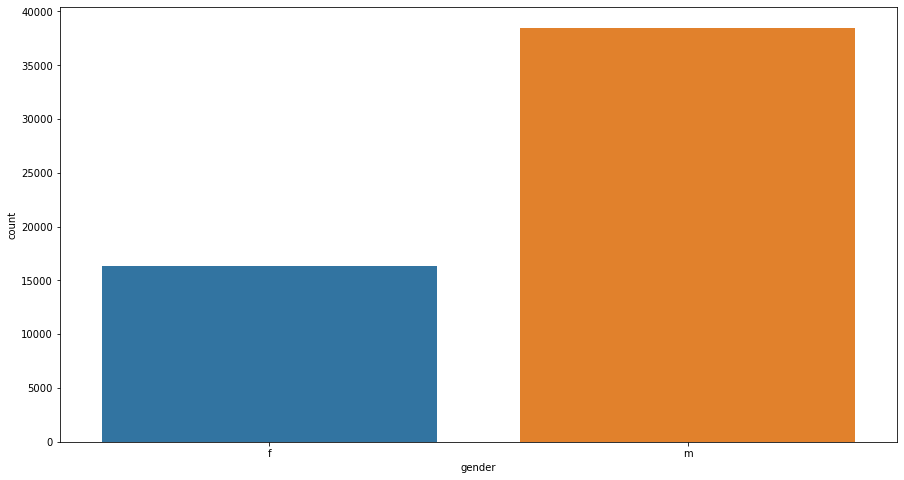

In [11]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.gender)

#### "recruitment_channel" uni analysis

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

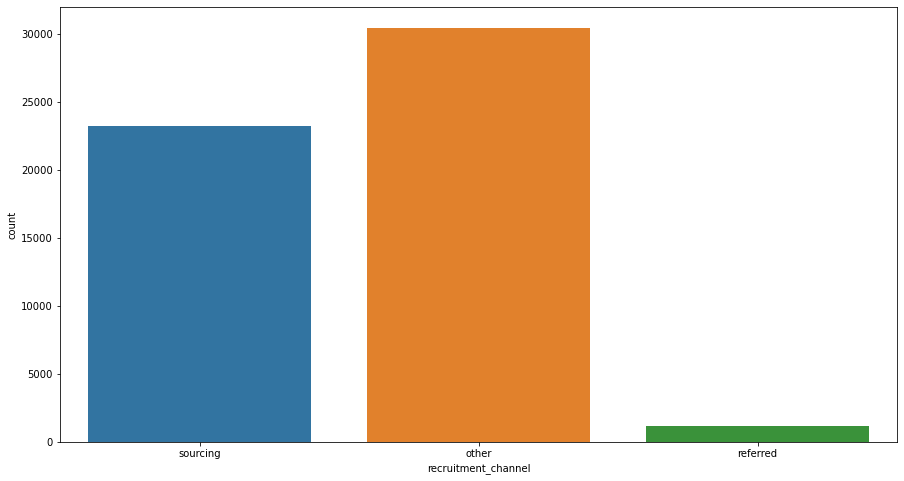

In [12]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.recruitment_channel)

#### "no_of_trainings" uni analysis

<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

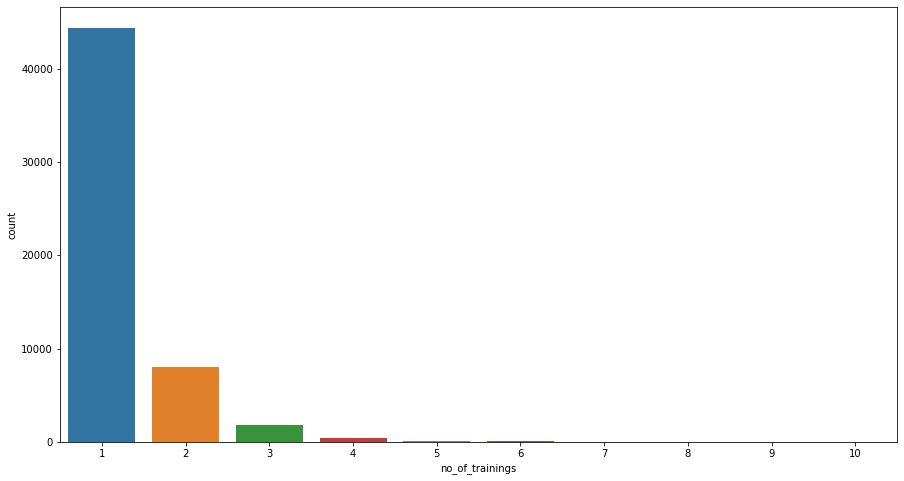

In [13]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.no_of_trainings)

#### "age" uni analysis

<AxesSubplot:xlabel='age', ylabel='Density'>

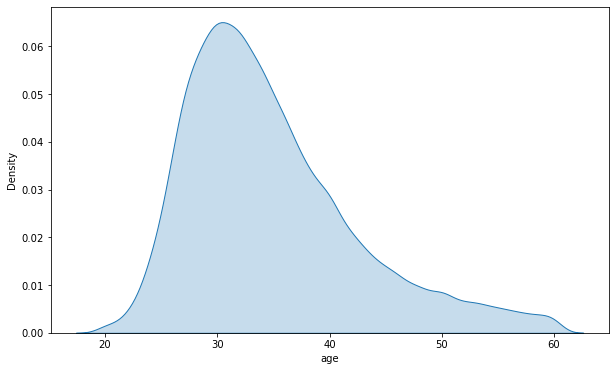

In [14]:
plt.figure(figsize=[10, 6])
sns.kdeplot(x=df.age, shade=True)

#### "previous_year_rating" uni analysis

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

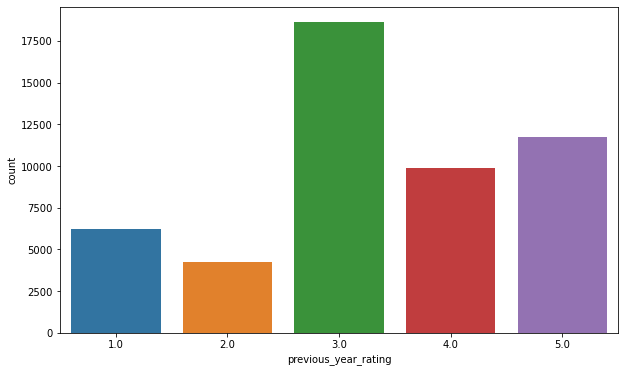

In [15]:
plt.figure(figsize=[10, 6])
sns.countplot(x=df.previous_year_rating)

#### "length_of_service" uni analysis

<AxesSubplot:xlabel='length_of_service'>

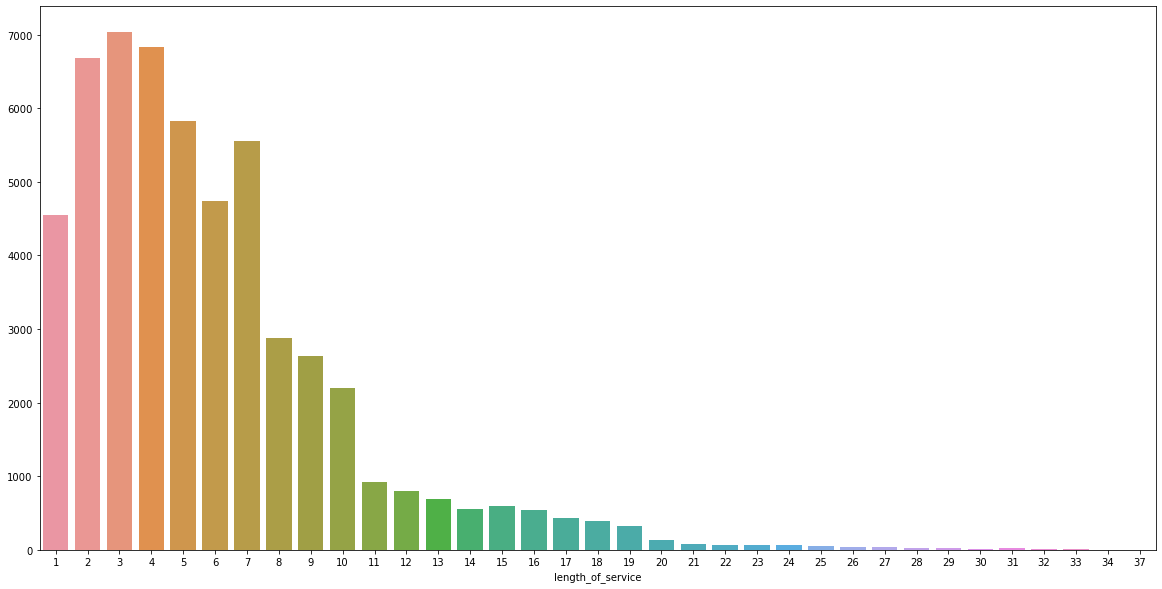

In [16]:
plt.figure(figsize=[20, 10])
service_count = (df.groupby('length_of_service').count()).employee_id.sort_values(ascending=False)
sns.barplot(x=service_count.index, y= service_count.values)

#### "KPIs_met >80%" uni analysis

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

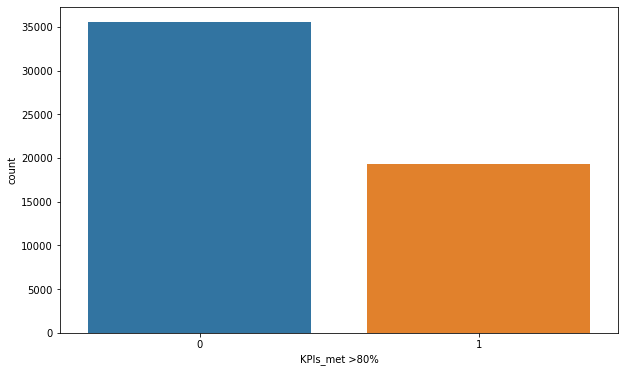

In [17]:
plt.figure(figsize=[10, 6])
sns.countplot(x=df['KPIs_met >80%'])

#### "awards_won?" uni analysis

<AxesSubplot:xlabel='awards_won?', ylabel='count'>

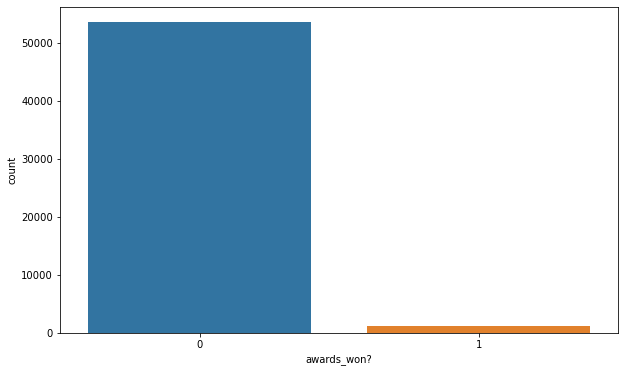

In [18]:
plt.figure(figsize=[10, 6])
sns.countplot(x=df['awards_won?'])

#### "avg_training_score" uni analysis

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

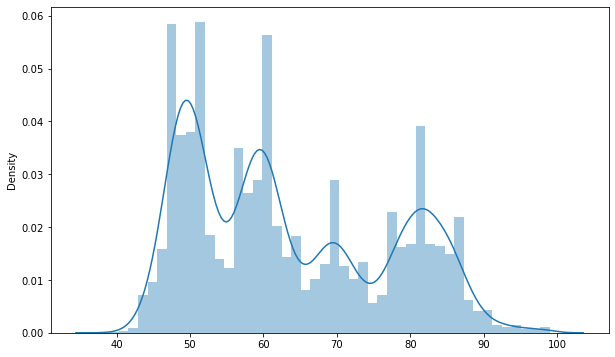

In [19]:
plt.figure(figsize=[10, 6])
sns.distplot(x=df['avg_training_score'])

#### "is_promoted" uni analysis

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

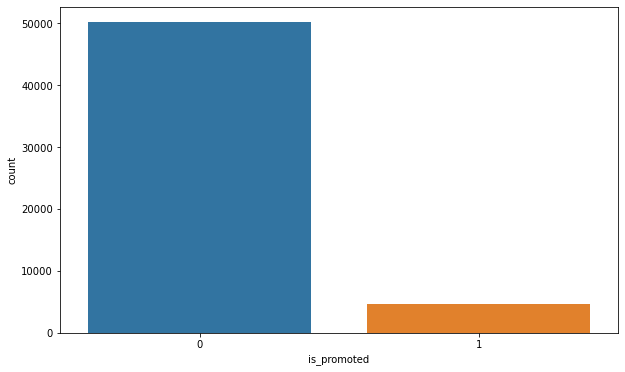

In [20]:
plt.figure(figsize=[10, 6])
sns.countplot(x=df.is_promoted)

### Feature engineering for "length_of_service"

In [21]:
def title(x):

    if x <= 3:

        return 'Entry-Level'

    elif x >=4 and x < 7:
        
        return 'Mid-Level'

    else:

        return 'Experienced-Level'

In [22]:
df['seniority_level'] = df.length_of_service.apply(title)

#### "seniority_level" uni analysis

<AxesSubplot:xlabel='seniority_level', ylabel='count'>

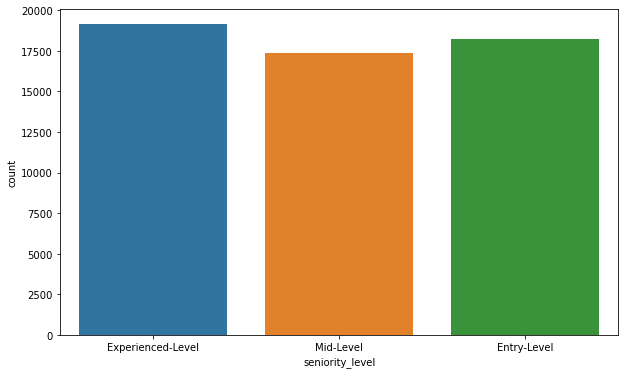

In [23]:
plt.figure(figsize=[10, 6])
sns.countplot(x=df.seniority_level)

In [24]:
df.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,seniority_level
18299,22858,R&D,region_2,NaN,m,other,2,24,NaN,1,1,0,83,1,Entry-Level
18012,27568,Sales & Marketing,region_2,Master's & above,m,other,3,32,1.0,6,0,0,47,0,Mid-Level
7688,35389,Finance,region_2,Bachelor's,m,other,1,29,NaN,1,1,0,56,0,Entry-Level
1805,36658,Sales & Marketing,region_22,Bachelor's,m,other,1,28,2.0,3,1,0,54,0,Entry-Level
8723,42852,Operations,region_2,Bachelor's,m,sourcing,1,44,4.0,3,0,0,60,0,Entry-Level


## Bivariate Analysis

#### Heatmap

<AxesSubplot:>

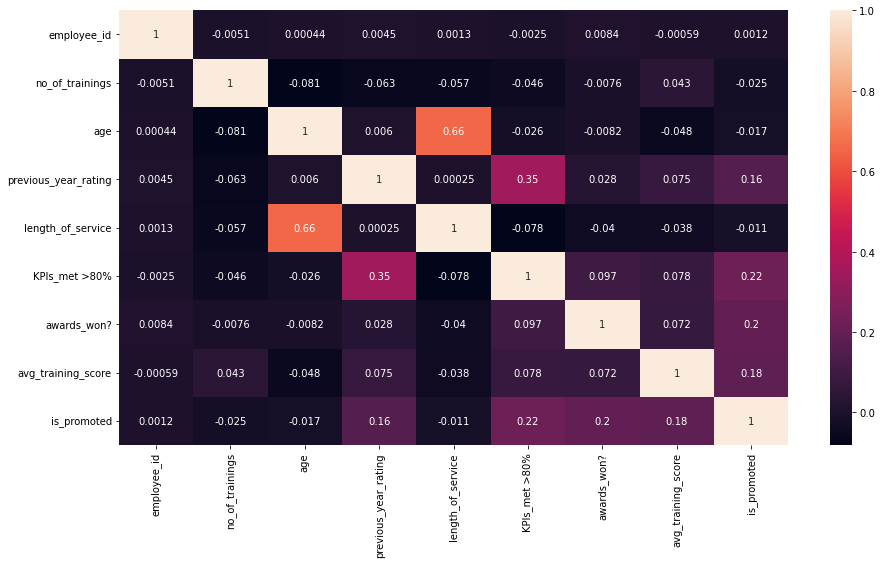

In [25]:
plt.figure(figsize=[15, 8])
sns.heatmap(df.corr(), annot=True)

#### KPI Vs previous_year_rating

Text(0.5, 1.0, 'KPI Vs Previous year rating')

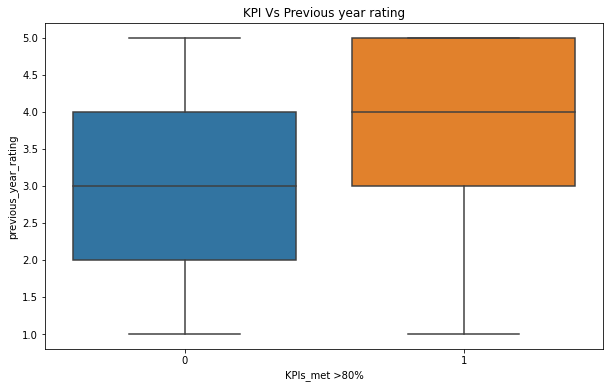

In [26]:
plt.figure(figsize=[10, 6])
sns.boxplot(x= df['KPIs_met >80%'], y= df.previous_year_rating)
plt.title('KPI Vs Previous year rating')

#### Gender in each department

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='count'>

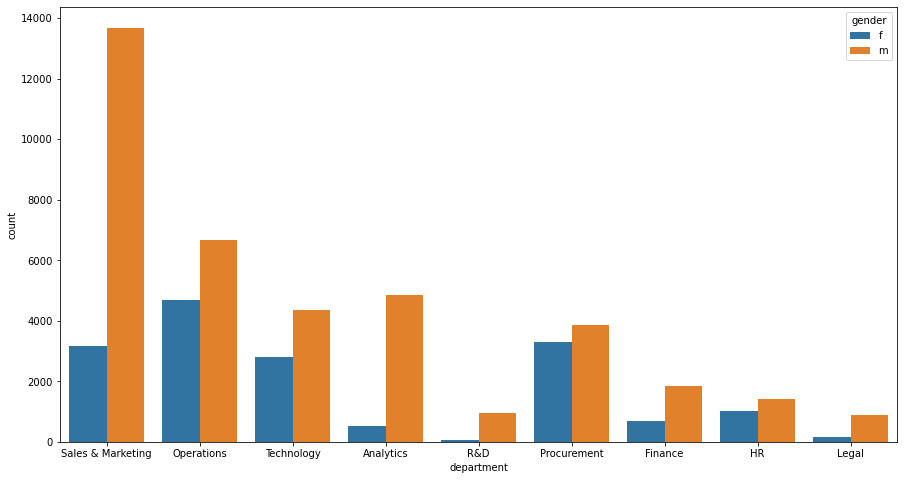

In [27]:
plt.figure(figsize=[15, 8])
sns.countplot(df.department, hue=df.gender)

#### no of trainings for diferent seniority levels

<AxesSubplot:xlabel='seniority_level', ylabel='no_of_trainings'>

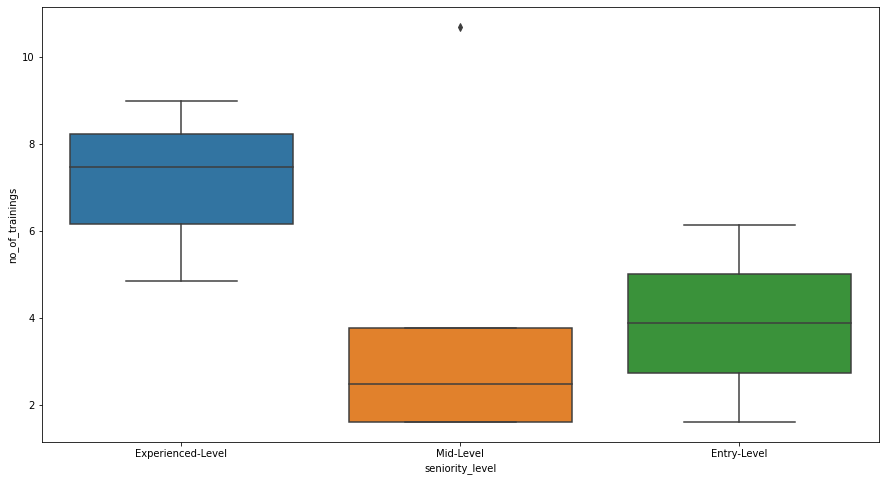

In [28]:
plt.figure(figsize=[15, 8])
sns.boxplot(x=df.seniority_level , y= np.log(df.no_of_trainings.value_counts()))

#### Recruitment channel in each department

<AxesSubplot:xlabel='department', ylabel='count'>

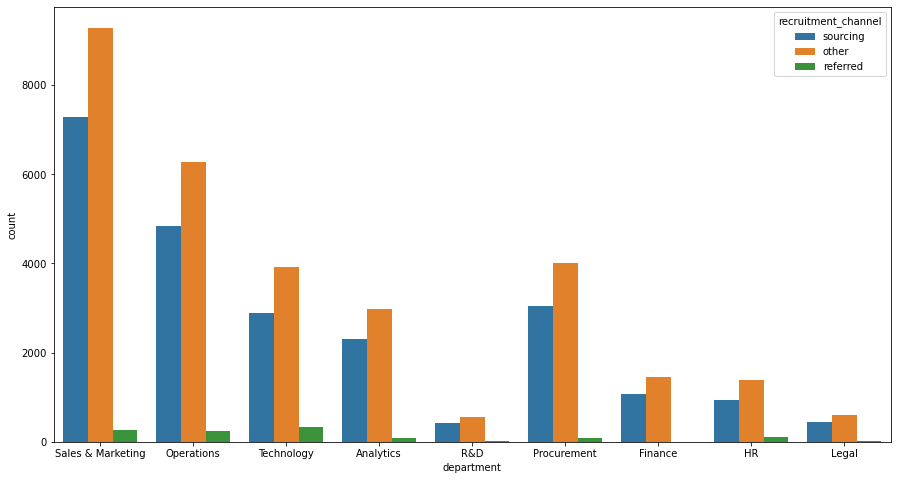

In [29]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.department, hue=df.recruitment_channel)

#### KPI achieved by each gender

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

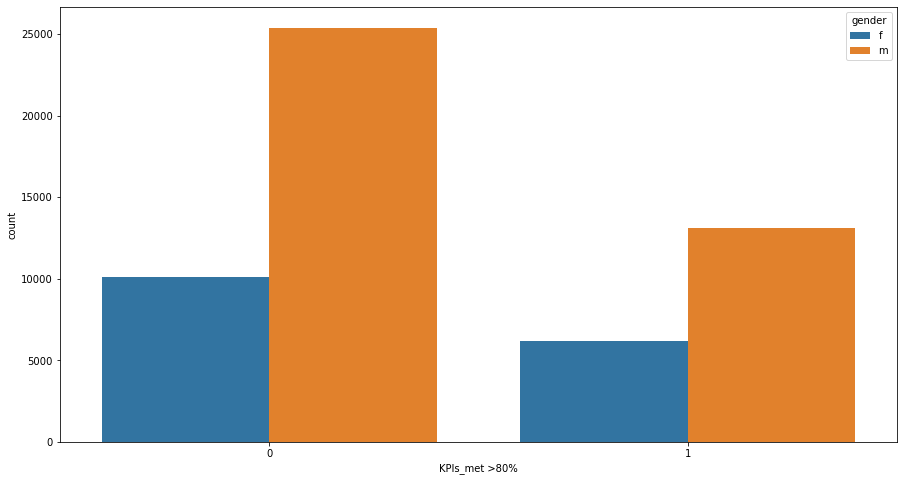

In [30]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df['KPIs_met >80%'], hue=df.gender)

#### Seniority level for each gender

<AxesSubplot:xlabel='seniority_level', ylabel='count'>

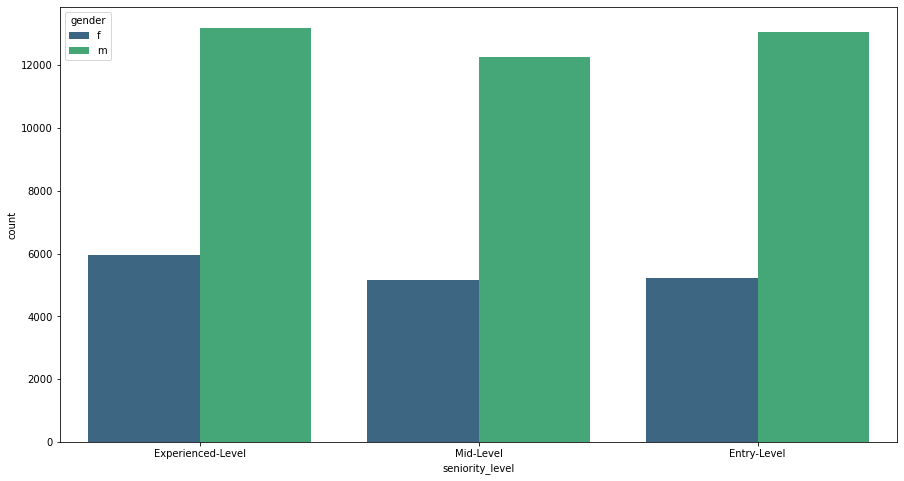

In [31]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.seniority_level, hue=df.gender, palette='viridis')

#### Educational degree for each seniority level

<AxesSubplot:xlabel='seniority_level', ylabel='count'>

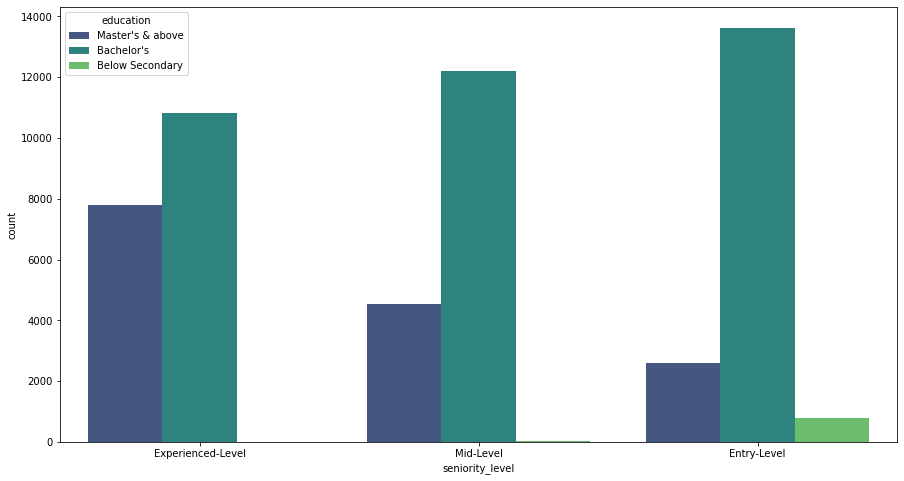

In [32]:
plt.figure(figsize=[15, 8])
sns.countplot(x=df.seniority_level, hue=df.education, palette='viridis')

## Analysis Questions ?

### 1) Which department has the highest number of promoted employees ?

<AxesSubplot:xlabel='department', ylabel='count'>

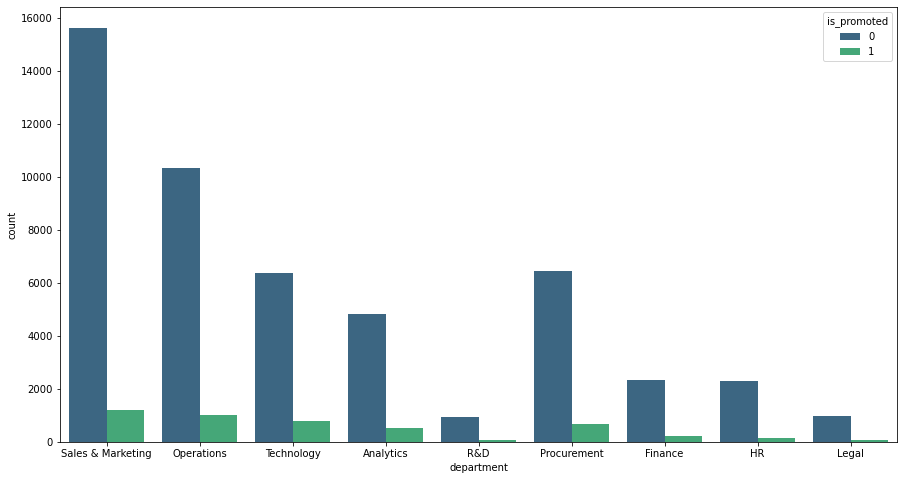

In [33]:
plt.figure(figsize=[15, 8])
sns.countplot(x= df.department, hue= df.is_promoted, palette='viridis')

### 2) Top 10 regions that have promoted employees ?

<AxesSubplot:xlabel='region', ylabel='is_promoted'>

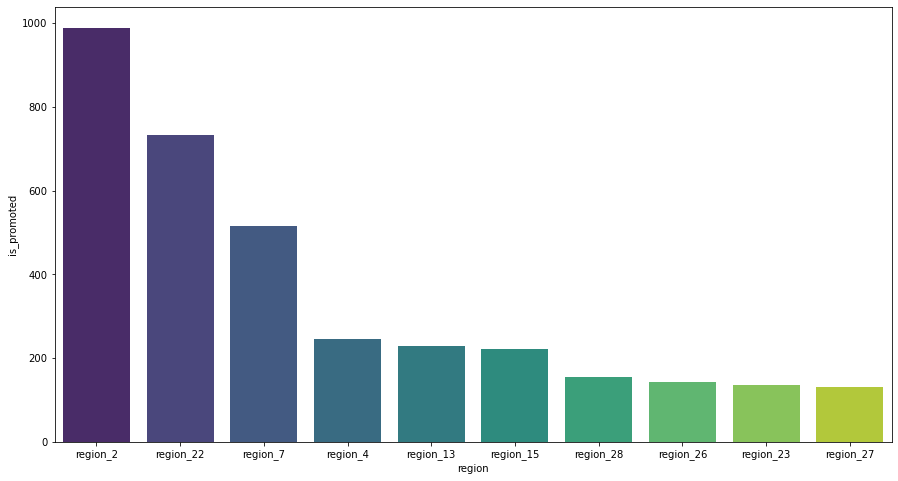

In [34]:
plt.figure(figsize=[15, 8])
top_regions = df.groupby('region')[['is_promoted']].sum().sort_values(by='is_promoted', ascending=False)[:10]
sns.barplot(x= top_regions.index, y= top_regions.is_promoted, palette='viridis')

#### 3) Does educational degree increase the chance of getting a promotion ?

<AxesSubplot:xlabel='education', ylabel='is_promoted'>

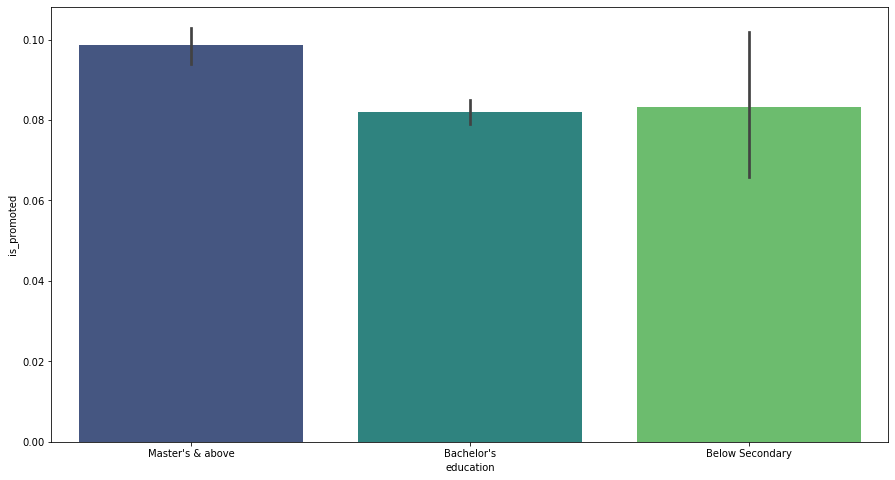

In [35]:
plt.figure(figsize=[15, 8])
sns.barplot(x= df.education, y=(df.is_promoted), palette='viridis')

#### 4) Which recruitment channel provides highest number of promoted employees ?

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recruitment_channel', ylabel='is_promoted'>

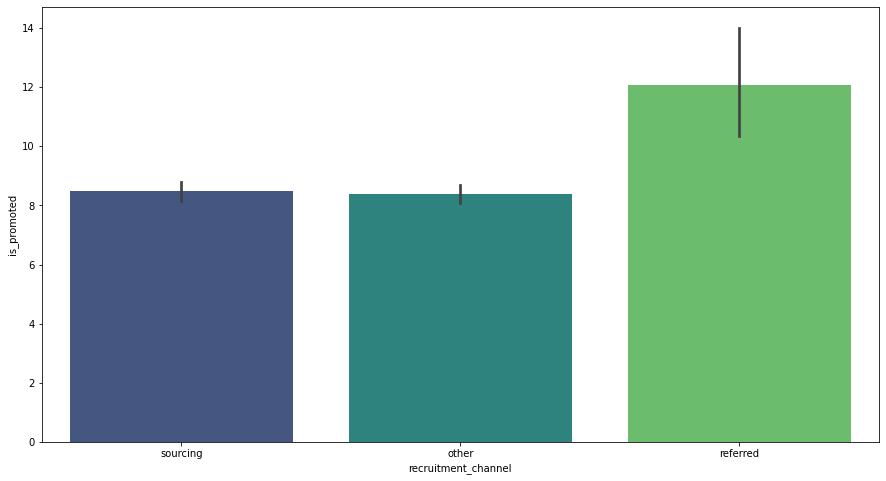

In [36]:
plt.figure(figsize=[15, 8])
sns.barplot(df.recruitment_channel, y= (df.is_promoted * 100), palette='viridis')

#### 5) How number of trainings affects getting promoted ?

<AxesSubplot:xlabel='no_of_trainings', ylabel='is_promoted'>

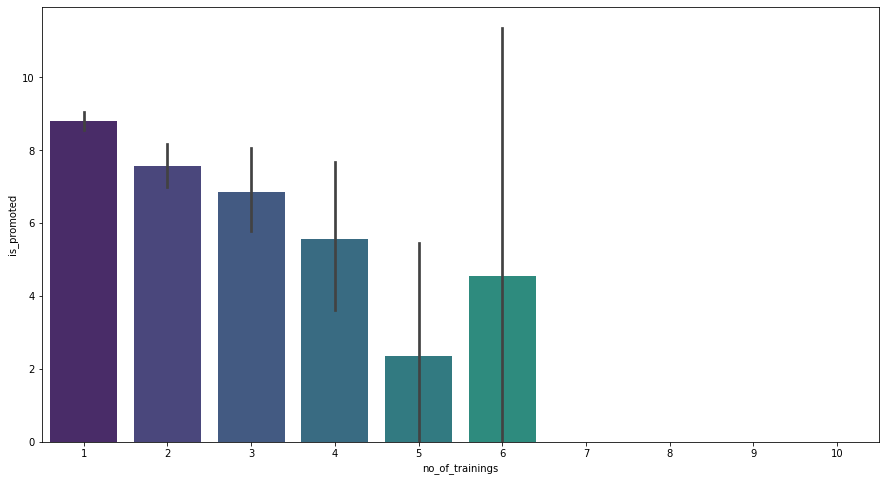

In [37]:
plt.figure(figsize=[15, 8])
sns.barplot(x=df.no_of_trainings, y=(df.is_promoted * 100), palette='viridis')

#### 6) How average training score affects getting promoted ?

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

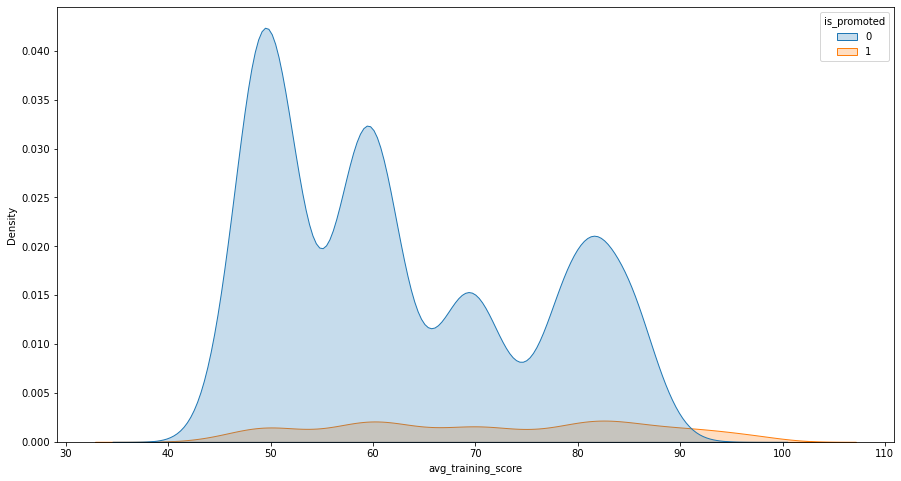

In [38]:
plt.figure(figsize=[15, 8])
sns.kdeplot(x=df.avg_training_score, hue=df.is_promoted, shade=True)

#### 7) How age affects chance of getting promoted ?

<AxesSubplot:xlabel='age', ylabel='Count'>

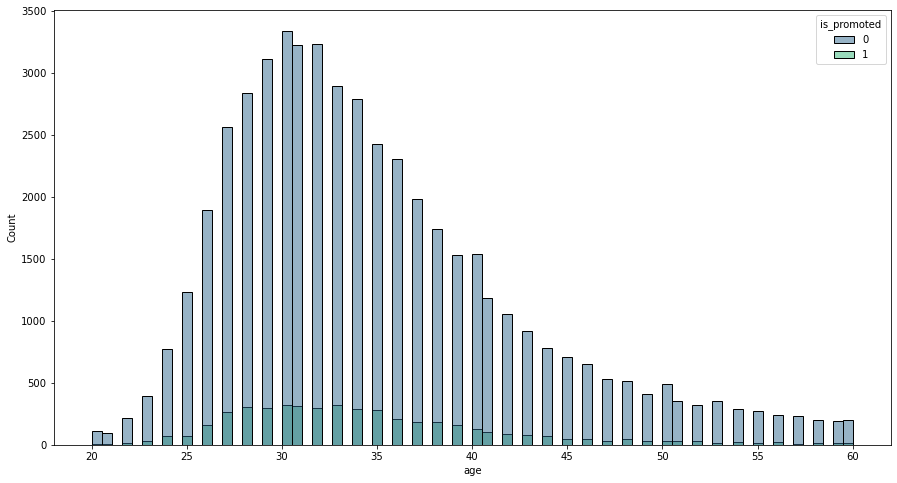

In [39]:
plt.figure(figsize=[15, 8])
sns.histplot(x= df.age, hue=df.is_promoted, palette='viridis')

#### 8) Impact of previous year rating on getting promoted ?

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

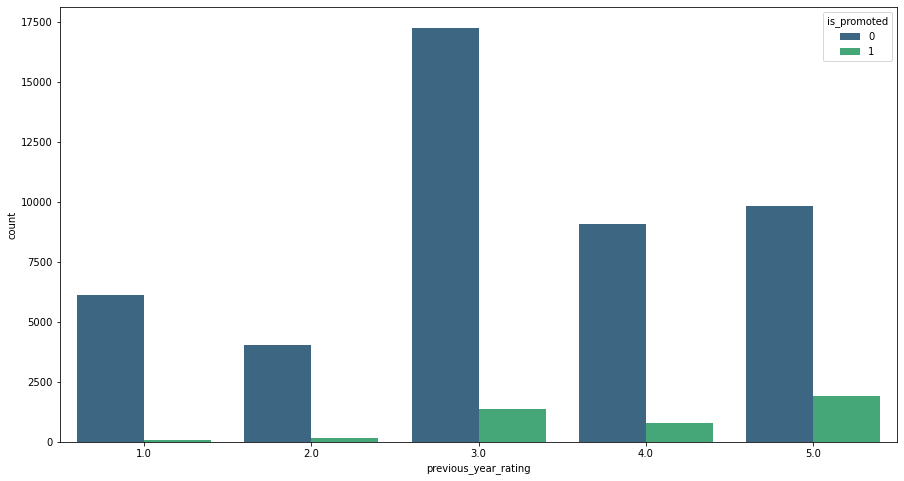

In [40]:
plt.figure(figsize=[15, 8])
sns.countplot(x= df.previous_year_rating, hue=df.is_promoted, palette='viridis')

<AxesSubplot:xlabel='previous_year_rating', ylabel='is_promoted'>

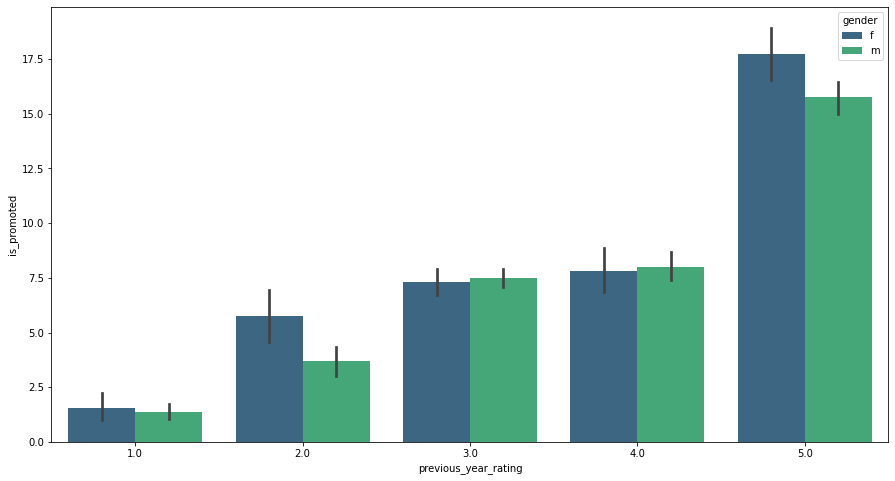

In [79]:
plt.figure(figsize=[15, 8])
sns.barplot(x= df.previous_year_rating, y=(df.is_promoted * 100), palette='viridis')

#### 9) How KPI's affects the chance of getting promoted ?

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

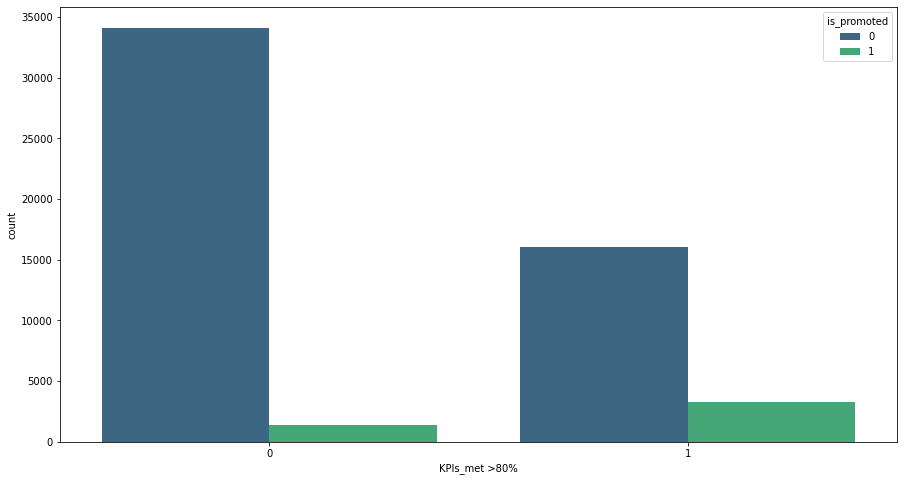

In [42]:
plt.figure(figsize=[15, 8])
sns.countplot(x= df['KPIs_met >80%'], hue=df.is_promoted, palette='viridis')

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='is_promoted'>

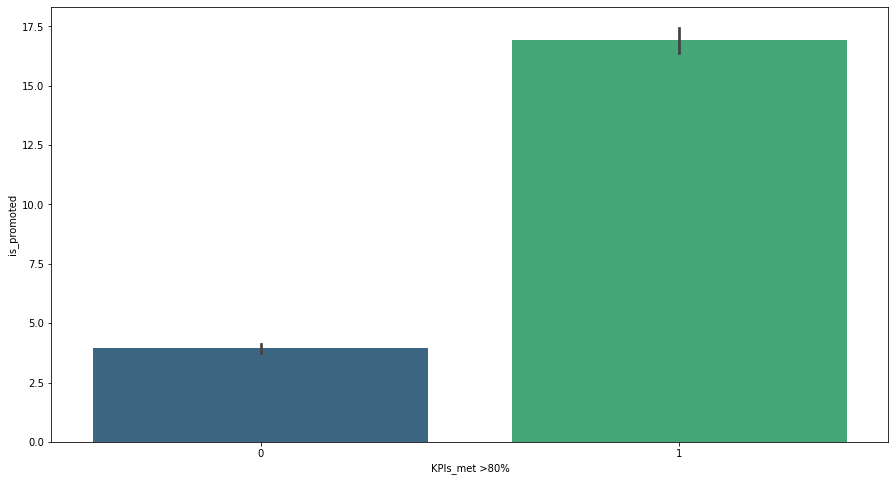

In [43]:
plt.figure(figsize=[15, 8])
sns.barplot(x= df['KPIs_met >80%'], y=(df.is_promoted * 100), palette='viridis')

#### 10) How winning an award affects the chance of getting promoted ?

<AxesSubplot:xlabel='awards_won?', ylabel='count'>

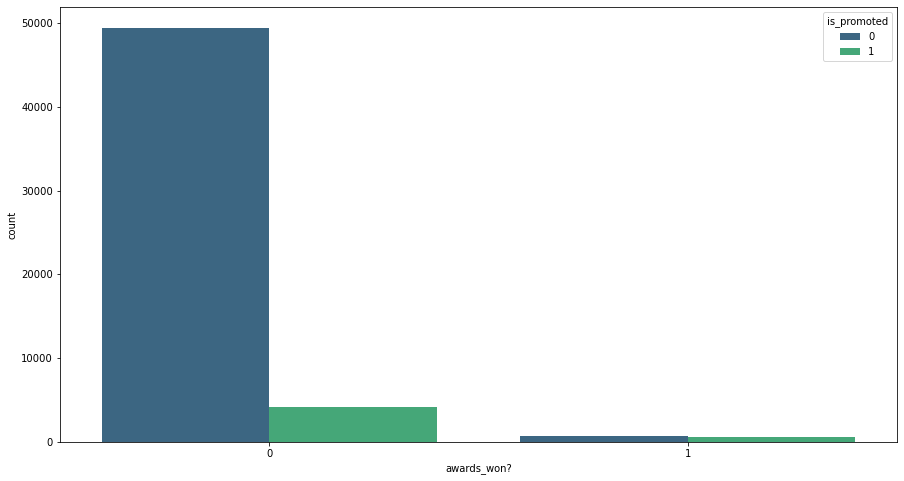

In [44]:
plt.figure(figsize=[15, 8])
sns.countplot(x= df['awards_won?'], hue=df.is_promoted, palette='viridis')

#### 11) Which seniority level has the highest number of promoted employees ?

<AxesSubplot:xlabel='seniority_level', ylabel='count'>

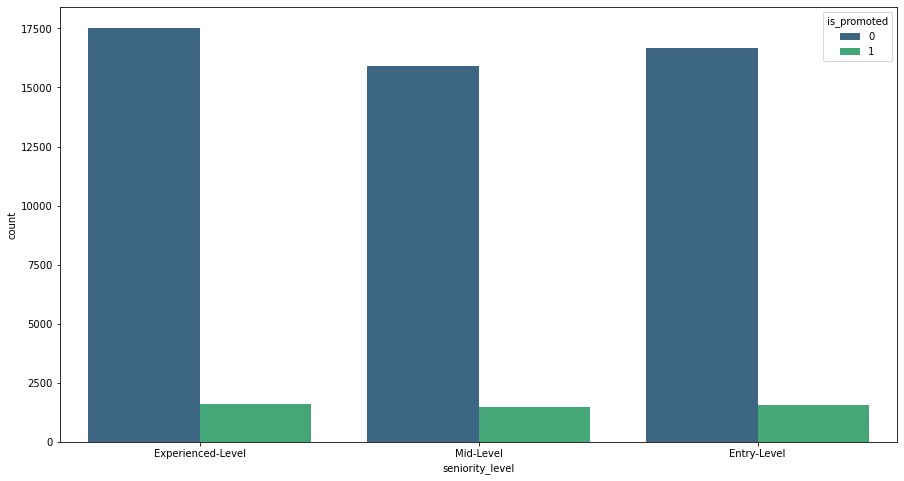

In [45]:
plt.figure(figsize=[15, 8])
sns.countplot(x= df.seniority_level, hue=df.is_promoted, palette='viridis')

# Dealing with Missing Values

#### Percentage of missing values in each feature

In [46]:
round((df.isna().sum() / df.shape[0]) * 100, 1)

employee_id             0.0
department              0.0
region                  0.0
education               4.4
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    7.5
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
seniority_level         0.0
dtype: float64

#### Filling missing values by the 'mode'

In [47]:
df.education.fillna(df.education.mode()[0], inplace=True)
df.previous_year_rating.fillna(df.previous_year_rating.mode()[0], inplace=True)

# Handling Outliers

In [48]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


#### Visualize the outliers

<AxesSubplot:xlabel='age'>

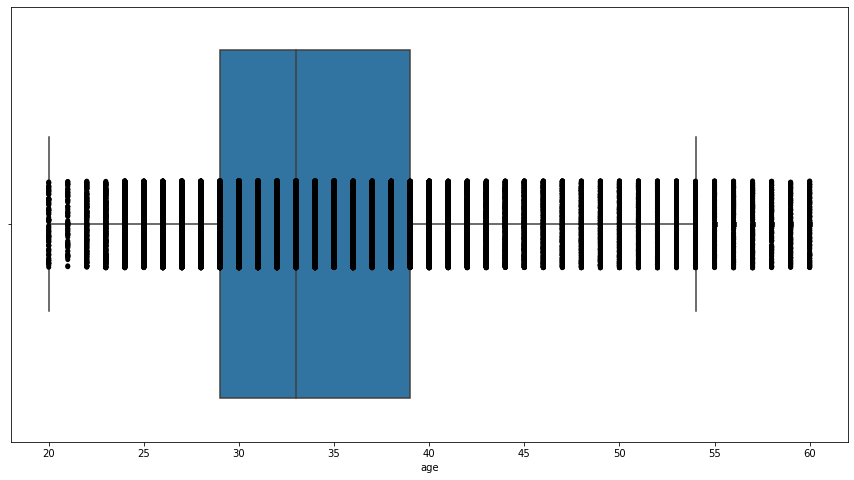

In [49]:
plt.figure(figsize=[15, 8])
sns.boxplot(x = df.age)
sns.stripplot(x = df.age, color='black')

<AxesSubplot:xlabel='length_of_service'>

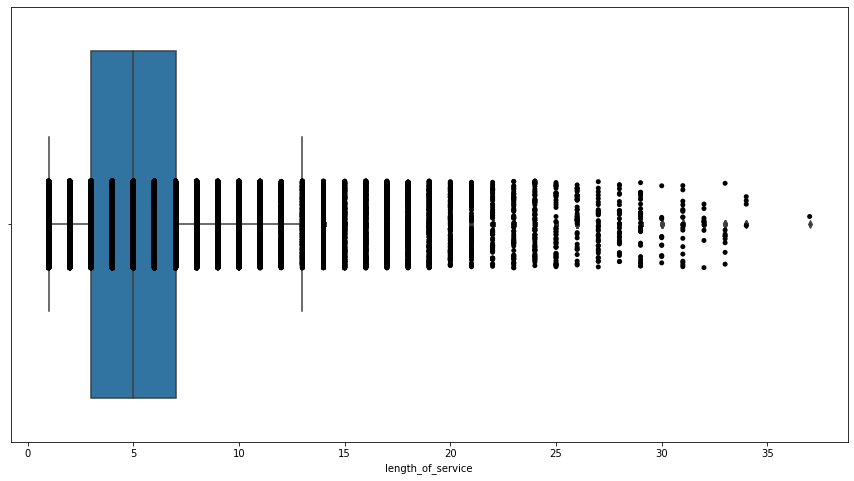

In [50]:
plt.figure(figsize=[15, 8])
sns.boxplot(x = df.length_of_service)
sns.stripplot(x = df.length_of_service, color='black')

#### Import datasist library

In [51]:
from datasist.structdata import detect_outliers

#### Replace outliers by the 'mode'

In [77]:
for c in ['age', 'length_of_service']:

    outliers_indeces = detect_outliers(df, 0, [c])

    mode = df[c].mode()[0]

    df[c].iloc[outliers_indeces] = mode

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2512\3298836472.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c].iloc[outliers_indeces] = mode
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2512\3298836472.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c].iloc[outliers_indeces] = mode


## Split input features and target variable

In [249]:
X = df.drop('is_promoted', axis=1)
y = df.is_promoted

## Dealing with Categorical data

In [253]:
X = pd.get_dummies(X, drop_first=True)
X

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,seniority_level_Experienced-Level,seniority_level_Mid-Level
0,65438,1,35,5.0,8,1,0,49,0,0,...,1,0,0,0,1,0,0,1,1,0
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,1,0,0,0,1
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,1,0,1,1,0
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,1,0,0,1,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,33,0,0,78,0,0,...,0,0,0,0,0,1,0,1,1,0
54804,74592,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,1,0,0,0,0,1
54805,13918,1,27,5.0,3,1,0,79,0,0,...,0,0,0,0,0,1,0,0,0,0
54806,13614,1,29,1.0,2,0,0,45,0,0,...,0,0,1,0,0,1,0,1,0,0


## Split data into Train and Test

In [254]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Handle imbalanced data

#### Check percentage of target variable classes

In [273]:
(df.is_promoted.value_counts() / df.shape[0] * 100)

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

In [263]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

## Feature Scaling

In [268]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)

In [269]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = scaler.get_feature_names_out())
x_train_scaled

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,seniority_level_Experienced-Level,seniority_level_Mid-Level
0,1.344269,-0.334869,3.343876,-0.524547,4.068541,-0.841526,-0.135052,-0.355175,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.48280,-1.210129,-0.109994,1.479804,1.750320,-0.524941
1,-0.989841,-0.334869,0.865640,1.276126,0.550507,1.188318,-0.135052,0.244747,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,2.07125,-1.210129,-0.109994,1.479804,1.750320,-0.524941
2,1.711563,-0.334869,0.369993,-0.524547,-0.367241,1.188318,-0.135052,0.394727,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.48280,-1.210129,-0.109994,-0.675765,-0.571324,1.904975
3,0.341431,-0.334869,1.030856,-0.524547,-0.673157,-0.841526,-0.135052,-1.180068,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,2.07125,0.826358,-0.109994,-0.675765,-0.571324,-0.524941
4,-0.546450,1.698168,1.196072,-0.524547,-0.214283,-0.841526,-0.135052,1.144629,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,2.07125,0.826358,-0.109994,-0.675765,-0.571324,1.904975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80219,0.452168,-0.334869,-1.116948,0.719681,-0.367241,-0.841526,-0.135052,1.594571,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.48280,0.826358,-0.109994,-0.675765,-0.571324,-0.524941
80220,1.527059,-0.334869,-0.456085,-1.305255,-0.061325,-0.841526,-0.135052,-0.280185,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.48280,0.826358,-0.109994,-0.675765,-0.571324,-0.524941
80221,0.303932,-0.334869,-0.951733,0.375789,-0.214283,1.188318,-0.135052,-1.255058,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.48280,-1.210129,-0.109994,-0.675765,-0.571324,-0.524941
80222,-1.025142,-0.334869,-0.786517,0.421010,-0.826115,1.188318,-0.135052,-0.355175,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.48280,0.826358,-0.109994,-0.675765,-0.571324,-0.524941


In [270]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns = scaler.get_feature_names_out())
x_test_scaled

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,seniority_level_Experienced-Level,seniority_level_Mid-Level
0,-0.316402,-0.334869,-0.456085,1.276126,-0.214283,1.188318,-0.135052,-1.255058,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.4828,0.826358,-0.109994,-0.675765,-0.571324,1.904975
1,-1.381270,-0.334869,-1.116948,-0.524547,-0.673157,-0.841526,-0.135052,-1.105078,-0.162705,-0.158994,...,4.204059,-0.08124,-0.065719,-0.090169,-0.4828,0.826358,-0.109994,-0.675765,-0.571324,-0.524941
2,1.433334,-0.334869,1.361287,-0.524547,0.397549,-0.841526,-0.135052,-1.480029,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.4828,-1.210129,-0.109994,-0.675765,1.750320,-0.524941
3,-1.181423,-0.334869,-0.951733,-0.524547,-0.061325,-0.841526,-0.135052,0.394727,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.4828,0.826358,-0.109994,-0.675765,-0.571324,1.904975
4,0.901230,1.698168,-1.282164,-0.524547,-0.520199,-0.841526,-0.135052,0.244747,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.4828,-1.210129,-0.109994,-0.675765,-0.571324,-0.524941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,1.167546,-0.334869,-1.116948,-2.325220,-0.673157,-0.841526,-0.135052,-1.030088,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.4828,-1.210129,-0.109994,-0.675765,-0.571324,-0.524941
10958,-1.168586,-0.334869,-1.282164,-0.524547,-0.673157,-0.841526,-0.135052,0.244747,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.4828,0.826358,-0.109994,1.479804,-0.571324,-0.524941
10959,0.186556,1.698168,-0.951733,1.276126,-0.367241,1.188318,-0.135052,-1.405039,-0.162705,-0.158994,...,-0.237865,-0.08124,-0.065719,-0.090169,-0.4828,-1.210129,-0.109994,1.479804,-0.571324,1.904975
10960,-1.713043,-0.334869,-0.290870,1.276126,-0.061325,1.188318,-0.135052,1.219620,-0.162705,-0.158994,...,4.204059,-0.08124,-0.065719,-0.090169,-0.4828,0.826358,-0.109994,1.479804,-0.571324,1.904975
